# Microsoft Azure Computer Vision

## Information about Microsoft Azure:

https://azure.microsoft.com/en-us/services/cognitive-services/computer-vision/

### Creating an Account

Create a Microsoft Azure account for trying the Cognitive Services for free.

Go here: https://azure.microsoft.com/en-us/free/ai/

Do the "Sign Up (for free)" option and sign up for a "Free Azure account" (if you already have a Microsoft Account you can use that, or otherwise create a new one).  Note that they do need a **credit card number** to provide verification, but will not charge you (unless you upgrade).

This notebook explains using the "Computer Vision" cognitive services to identify featues of an image (what's in the image).

Once you sign up, here is the documentation on using Python for accessing the Computer Vision Cognitive Services:

https://docs.microsoft.com/en-us/azure/cognitive-services/Computer-vision/quickstarts-sdk/python-sdk

### Getting Your Personal Key

To use Azure, you need to get an `endpoint` and `key` for accessing their services (e.g. your own personal unique credentials associated with your account for accessing their services). It is possible to get these without an account, but they are only valid for 7 days.  We will assume you successfully created an account and have a Microsoft Account associated with the Azure Cognitive Servives.

For Azure subscription users, you need to create a resource in your subscription.  Go to your portal, "Create a Resource" and search for the Computer Vision resource. Once you create it:

- Give it a name like "my_vision"
- Use the "Free Trial"
- Specify your location as "East US 2"
- Use the "F0 (20 calls per minute)" pricing (this is the free one)
- Create a new resource group (e.g. "my_group")

https://portal.azure.com/#create/Microsoft.CognitiveServicesComputerVision

**Note: the interface for creating a resource may have changed.  These screenshots may not longer be accurate.**

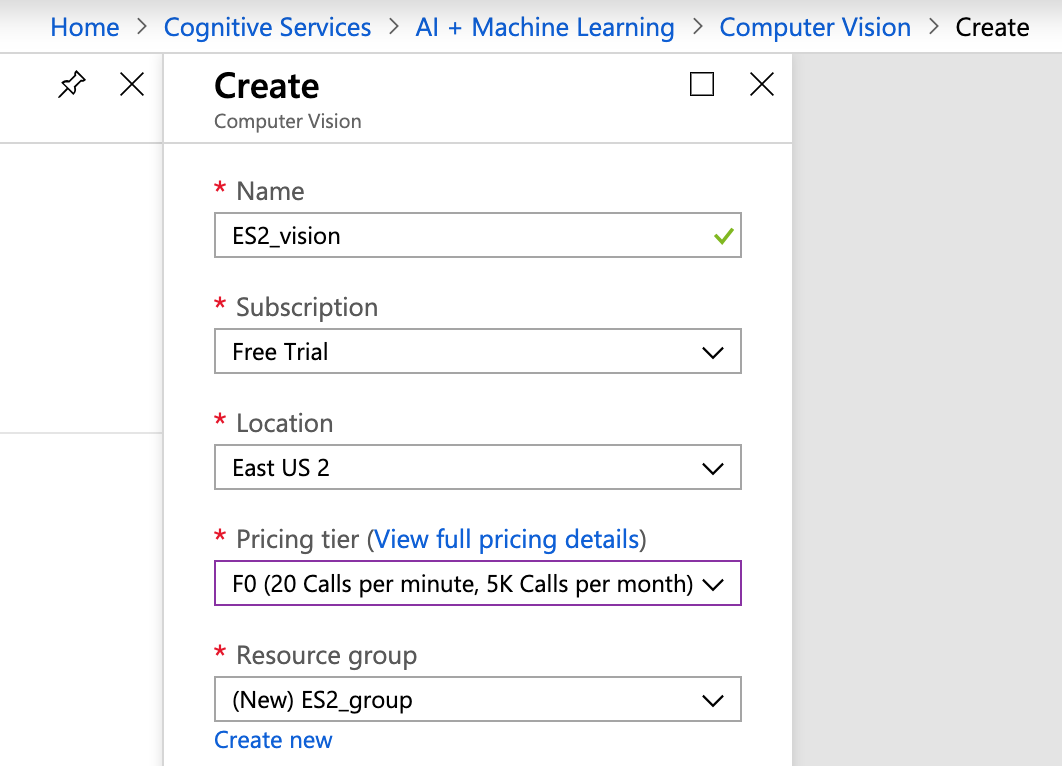

Once created you should get a "Validation Successful" response and it'll initialize and *deploy* your new resource.

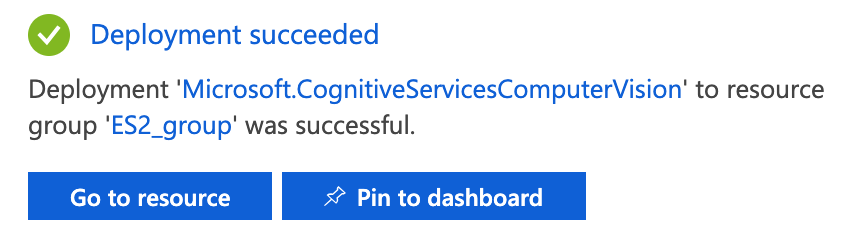

Now you can go to your Dashboard, find the resource just created, and find your "key" (e.g. "Key 1") associated with your vision resource.  Create a file called `AzureKey.txt` and store your key in that file (single line).

Now we want to load the `key` and `endpoint` into our Python code so we can access the Microsoft Azure vision resources.

List of `endpoint` URLs (and information on subscribing):

https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/vision-api-how-to-topics/howtosubscribe

Assuming you specified "East US 2" when signing up, this is your `endpoint` URL: "https://eastus2.api.cognitive.microsoft.com/"

More info about the Computer Vision Cognitive Services here:

https://docs.microsoft.com/en-us/azure/cognitive-services/Computer-vision/quickstarts-sdk/python-sdk

More info (if you are curious) about endpoints here:

https://docs.microsoft.com/en-us/azure/virtual-network/virtual-network-service-endpoints-overview

If everything is set properly, the following code will describe the "tags" identified in the following remote image:

https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg

In [2]:
# Local Code for Analyzing Remote Image (URL)
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

# load your personal key
def getKey(filename):
    fin = open(filename)
    for line in fin:
        key = line.strip()
    fin.close()
    return key

Azurekeyfile = 'AzureKey.txt'

key = getKey(Azurekeyfile) # print(key) to check it loaded properly
endpoint = "https://eastus2.api.cognitive.microsoft.com/"

# Set credentials
credentials = CognitiveServicesCredentials(key)

# Create client
client = ComputerVisionClient(endpoint, credentials)

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.tags])

for tag in image_analysis.tags:
    print(tag)

{'additional_properties': {}, 'name': 'skyscraper', 'confidence': 0.9977022409439087, 'hint': None}
{'additional_properties': {}, 'name': 'building', 'confidence': 0.9925744533538818, 'hint': None}
{'additional_properties': {}, 'name': 'outdoor', 'confidence': 0.9722763299942017, 'hint': None}
{'additional_properties': {}, 'name': 'light', 'confidence': 0.9163984060287476, 'hint': None}
{'additional_properties': {}, 'name': 'street', 'confidence': 0.8764569759368896, 'hint': None}
{'additional_properties': {}, 'name': 'downtown', 'confidence': 0.8738466501235962, 'hint': None}
{'additional_properties': {}, 'name': 'cityscape', 'confidence': 0.8567550182342529, 'hint': None}
{'additional_properties': {}, 'name': 'sky', 'confidence': 0.8022665977478027, 'hint': None}
{'additional_properties': {}, 'name': 'city', 'confidence': 0.7708874940872192, 'hint': None}
{'additional_properties': {}, 'name': 'street light', 'confidence': 0.695668637752533, 'hint': None}
{'additional_properties': {},

### Using the Microsoft Azure API

Now that we have it set up so that we can use Microsoft Azure to analyze an image, we don't want to analyze an image that is stored elsewhere (e.g. at a URL) but rather a "local" image on our device.

Here is the documentation for using Python to access the Cognitive Servives Computer Vision functionality to analyze a local image.

https://docs.microsoft.com/en-us/azure/cognitive-services/Computer-vision/quickstarts/python-disk

Here are the parts we need to use/modify in order to make it work on our processor.  We are "sending an image to Microsoft" and then "examining the data it sends back" to look at the tags.

Setting up Azure Vision:
- Load in subscription key: `subscription_key = getKey(Azurekeyfile)`
- Note the change of `endpoint` URL to include vision: `vision_base_url = "https://eastus2.api.cognitive.microsoft.com/vision/v2.0/"`
- We add on "analyze" to vision URL: `analyze_url = vision_base_url + "analyze"`

Open an image and read in data:
- Put an image (any JPG image you find) into your Jupyter home directory
- Point `image_path` at that image: `image_path = "testimage.jpg"`
- Open image and read in data: `image_data = open(image_path, "rb").read()`

Set up the headers/parameters to send to Microsoft (to tell it what to do):
- `headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}`
- `params = {'visualFeatures': 'Categories,Description,Color'}`

Then make the request (post request, sending the headers, parameters, and image data to the URL):
- `response = requests.post(analyze_url, headers=headers, params=params, data=image_data)`

Then Microsoft Azure will send back the analyzed data requested (`Categories`, `Description`, `Color`) in a data structure.

In [3]:
import json
import requests

# load your personal key
def getKey(filename):
    fin = open(filename)
    for line in fin:
        key = line.strip()
    fin.close()
    return key

Azurekeyfile = 'AzureKey.txt'

subscription_key = getKey(Azurekeyfile)
vision_base_url = "https://eastus2.api.cognitive.microsoft.com/vision/v2.0/"
analyze_url = vision_base_url + "analyze"

image_path = "testimage.jpg"
# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
              'Content-Type': 'application/octet-stream'
             }
params     = {'visualFeatures': 'Categories,Description,Color'}

response = requests.post(analyze_url, headers=headers, params=params, data=image_data)

print(response) # should be <Response [200]> meaning "no error"
print(response.text)
print(json.loads(response.text))

<Response [200]>
{"categories":[{"name":"indoor_room","score":0.93359375}],"color":{"dominantColorForeground":"Brown","dominantColorBackground":"Grey","dominantColors":["Brown","Grey","Orange"],"accentColor":"B25019","isBwImg":false,"isBWImg":false},"description":{"tags":["table","cat","indoor","wooden","sitting","chair","living","wood","dining","room","small","white","flower","furniture","black","desk","red","laying"],"captions":[{"text":"a cat sitting on top of a wooden table","confidence":0.97915014835741077}]},"requestId":"961237da-e23f-45a5-9dab-e5c4d9b5ddda","metadata":{"width":1440,"height":1032,"format":"Jpeg"}}
{'categories': [{'name': 'indoor_room', 'score': 0.93359375}], 'color': {'dominantColorForeground': 'Brown', 'dominantColorBackground': 'Grey', 'dominantColors': ['Brown', 'Grey', 'Orange'], 'accentColor': 'B25019', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['table', 'cat', 'indoor', 'wooden', 'sitting', 'chair', 'living', 'wood', 'dining', 'room', 's

### Parsing Tags

Now that you can get back a description (list of tags) and captions (text describing image) in a `response` data structure, we need to parse that in order to extract the specific tags and text we want.

At this point, get out:
- list of tags (individual strings)
- text caption (sentence describing image)

Hint 1: don't forget to convert the `response.text` to a `dict` data structure (via the `json.loads()` function).

Hint 2: the `captions` value is a `list` of captions, although the list might only be a single item in length; you can just look at the first element in that list, and pull out the `text` value.

In [4]:
# assume that the Microsoft Azure image analysis has already been loaded into a "response" variable

print("Reponse Text:", response.text) # check that it's loaded properly

# convert to JSON object:
json_data = json.loads(response.text)

# write code to iterate through the list of tags, printing each one
description = json_data['description']
tags = description['tags']
print('TAGS:')
for tag in tags:
    print('-', tag)

# write code to store and print out the caption text
caption_text = description['captions'][0]['text']
print("CAPTION:", caption_text)

Reponse Text: {"categories":[{"name":"indoor_room","score":0.93359375}],"color":{"dominantColorForeground":"Brown","dominantColorBackground":"Grey","dominantColors":["Brown","Grey","Orange"],"accentColor":"B25019","isBwImg":false,"isBWImg":false},"description":{"tags":["table","cat","indoor","wooden","sitting","chair","living","wood","dining","room","small","white","flower","furniture","black","desk","red","laying"],"captions":[{"text":"a cat sitting on top of a wooden table","confidence":0.97915014835741077}]},"requestId":"961237da-e23f-45a5-9dab-e5c4d9b5ddda","metadata":{"width":1440,"height":1032,"format":"Jpeg"}}
TAGS:
- table
- cat
- indoor
- wooden
- sitting
- chair
- living
- wood
- dining
- room
- small
- white
- flower
- furniture
- black
- desk
- red
- laying
CAPTION: a cat sitting on top of a wooden table
